<a href="https://colab.research.google.com/github/kirtiman24/Stock-Price-Prediction/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [0]:
x_train=pd.read_csv('x_train.csv')

In [0]:
y_train=pd.read_csv('y_train.csv')

In [26]:
x_train.head(5)

(     High
 0  332.83
 1  333.87
 2  330.75
 3  328.77
 4  322.29,      High
 0  333.87
 1  330.75
 2  328.77
 3  322.29
 4  315.72)

In [27]:
y_train.head(5)

,High
0,333.87
1,330.75
2,328.77
3,322.29
4,315.72


No handles with labels found to put in legend.


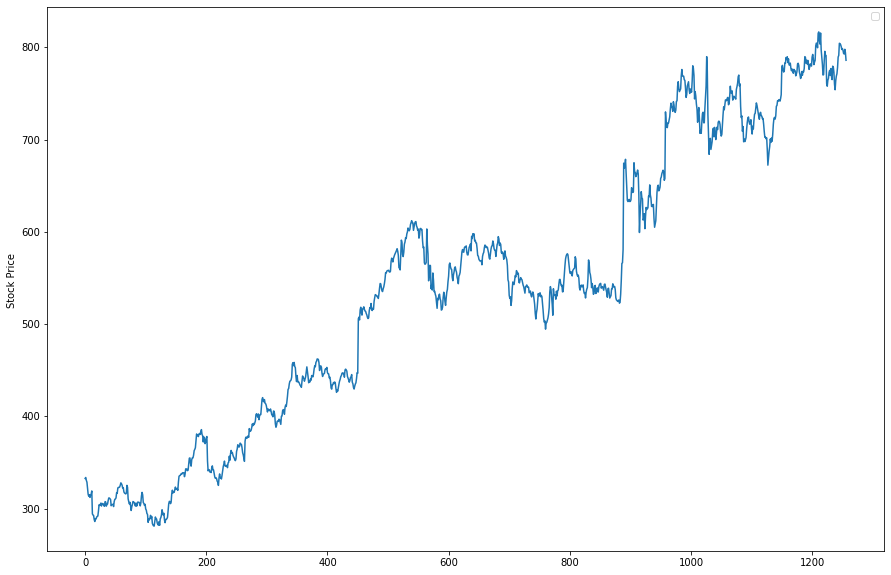

In [5]:
plt.figure(figsize=(15,10))
plt.plot(x_train['High'])
plt.ylabel('Stock Price ')
plt.legend(loc='best')
plt.show()

In [0]:
#Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x_train = sc.fit_transform(x_train)
y_train=sc.fit_transform(y_train)

In [16]:
print(X_train)

[[[0.09640129]
  [0.09834351]
  [0.09251685]
  ...
  [0.07903337]
  [0.08276841]
  [0.08751191]]

 [[0.09834351]
  [0.09251685]
  [0.08881917]
  ...
  [0.08276841]
  [0.08751191]
  [0.08564439]]

 [[0.09251685]
  [0.08881917]
  [0.07671765]
  ...
  [0.08751191]
  [0.08564439]
  [0.08274973]]

 ...

 [[0.9332549 ]
  [0.92416008]
  [0.92909033]
  ...
  [0.96264963]
  [0.95637477]
  [0.95529161]]

 [[0.92416008]
  [0.92909033]
  [0.93536519]
  ...
  [0.95637477]
  [0.95529161]
  [0.96485331]]

 [[0.92909033]
  [0.93536519]
  [0.93239584]
  ...
  [0.95529161]
  [0.96485331]
  [0.95807422]]]


In [29]:
print(y_train)

[[0.09834351]
 [0.09251685]
 [0.08881917]
 ...
 [0.95807422]
 [0.94257381]
 [0.93669113]]


In [32]:
#Converting our data into array for feeding into the LSTM Model
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train[0:20])


[[[0.09640129]]

 [[0.09834351]]

 [[0.09251685]]

 [[0.08881917]]

 [[0.07671765]]

 [[0.06444805]]

 [[0.06033951]]

 [[0.063589  ]]

 [[0.05806114]]

 [[0.06274861]]

 [[0.06463481]]

 [[0.07113377]]

 [[0.02463257]]

 [[0.02244757]]

 [[0.02153249]]

 [[0.01318468]]

 [[0.00926289]]

 [[0.01469737]]

 [[0.01439857]]

 [[0.01811493]]]


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [33]:
#LSTM Model Architecture
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
1257/1257 [==============================] - 1s 1ms/step - loss: 0.2183
Epoch 2/20
1257/1257 [==============================] - 0s 158us/step - loss: 0.0466
Epoch 3/20
1257/1257 [==============================] - 0s 151us/step - loss: 0.0164
Epoch 4/20
1257/1257 [==============================] - 0s 156us/step - loss: 0.0083
Epoch 5/20
1257/1257 [==============================] - 0s 155us/step - loss: 0.0098
Epoch 6/20
1257/1257 [==============================] - 0s 162us/step - loss: 0.0071
Epoch 7/20
1257/1257 [==============================] - 0s 161us/step - loss: 0.0061
Epoch 8/20
1257/1257 [==============================] - 0s 162us/step - loss: 0.0050
Epoch 9/20
1257/1257 [==============================] - 0s 158us/step - loss: 0.0047
Epoch 10/20
1257/1257 [==============================] - 0s 158us/step - loss: 0.0045
Epoch 11/20
1257/1257 [==============================] - 0s 183us/step - loss: 0.0043
Epoch 12/20
1257/1257 [==============================] - 0s 154us

In [0]:
x_test=pd.read_csv('x_test.csv')

In [0]:
x_test=sc.fit_transform(x_test)

In [51]:
print(x_test)

[[[0.        ]]

 [[0.03268349]]

 [[0.09269878]]

 [[0.34919725]]

 [[0.38876147]]

 [[0.37270642]]

 [[0.35397554]]

 [[0.33944954]]

 [[0.41265291]]

 [[0.33467125]]

 [[0.31689602]]

 [[0.37939602]]

 [[0.33027523]]

 [[0.5970948 ]]

 [[0.69323394]]

 [[0.88188073]]

 [[0.92450306]]

 [[1.        ]]

 [[0.50095566]]]


In [54]:
#Converting the test data into array 
X_test=np.array(x_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test[0:4])

[[[0.        ]]

 [[0.03268349]]

 [[0.09269878]]

 [[0.34919725]]]


In [0]:
#Using our test data for getting the predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [56]:
print(predicted_stock_price)

[[790.00476]
 [791.5583 ]
 [794.47174]
 [807.5838 ]
 [809.66034]
 [808.81714]
 [807.83435]
 [807.07306]
 [810.9156 ]
 [806.8229 ]
 [805.8933 ]
 [809.1684 ]
 [806.59283]
 [820.51416]
 [825.3404 ]
 [834.1297 ]
 [835.95465]
 [839.01764]
 [815.54425]]


In [0]:
x_test=sc.inverse_transform(x_test)

In [58]:
print(x_test)

[[789.63]
 [791.34]
 [794.48]
 [807.9 ]
 [809.97]
 [809.13]
 [808.15]
 [807.39]
 [811.22]
 [807.14]
 [806.21]
 [809.48]
 [806.91]
 [820.87]
 [825.9 ]
 [835.77]
 [838.  ]
 [841.95]
 [815.84]]


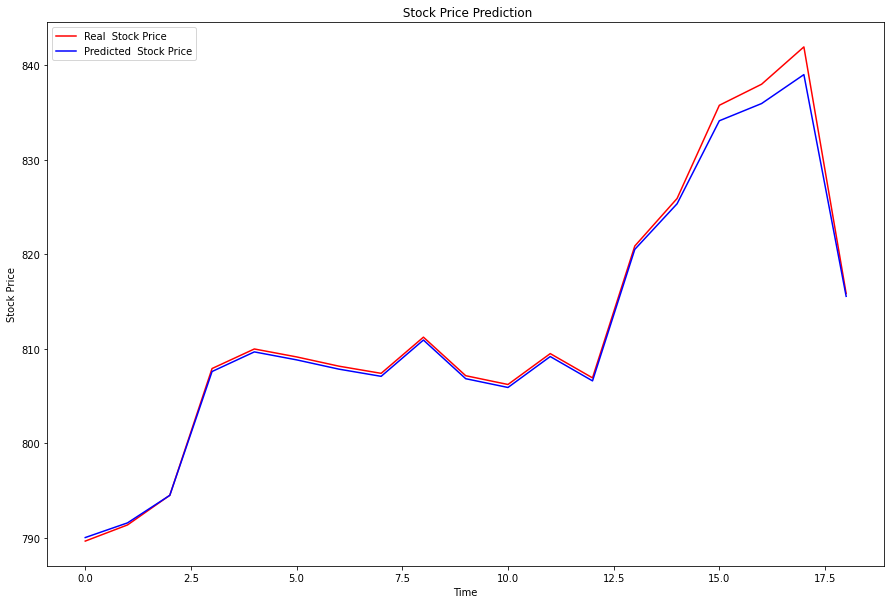

In [65]:
plt.figure(figsize=(15,10))
plt.plot(x_test[0:1257], color = 'red', label = 'Real  Stock Price')
plt.plot(predicted_stock_price[0:1257], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
df=pd.DataFrame(data=predicted_stock_price,columns=["High"])
df.to_csv('y_prediction.csv',index=True)